In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
train_dataset = pd.read_csv('/content/train.csv')
train_dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل


In [21]:
# preprocess

train_dataset = train_dataset.replace(
    [
        "گُل",
        "گُل به خودی",
        "مهار توسط دروازه بان",
        "موقعیت از دست رفته",
        "برخورد به دفاع",
        "برخورد به تیردروازه"
        ],
    [0, 0, 1, 1, 1, 1])

# train_dataset = train_dataset.replace(["S", "C", "Q"], [0, 1, 2])
train_dataset = train_dataset.fillna(0)
train_dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,0
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,1
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,1
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,1
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,0


In [22]:
Y = train_dataset[["outcome"]]
X = train_dataset[["x",	"y", "interveningOpponents", "interveningTeammates"]]

Y = np.array(Y).astype(np.float32)
X = np.array(X).astype(np.float32)

X_val = X[0:8000]
X_train = X[8000:]

Y_val = Y[:8000]
Y_train = Y[8000:]

In [9]:
model = tf.keras.models.Sequential([
    Dense(10, input_dim=4, activation="sigmoid"),
    Dense(16, activation="relu"),
    Dense(8, activation="relu"), 
    Dense(4, activation="sigmoid"),
    Dense(1, activation="linear"),
])

In [ ]:
model.summary()

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              loss=tf.losses.mse)

In [ ]:
output = model.fit(X_train, Y_train,
                   validation_data = (X_val, Y_val),
                   epochs=200,
                   shuffle=True)

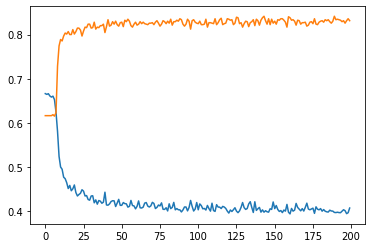

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])

In [ ]:
# plt.plot(output.history['val_loss'])
# plt.plot(output.history['val_accuracy'])

In [26]:
test_dataset = pd.read_csv('/content/test.csv')
test_dataset.head()

,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter
0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم
1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم
2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط
3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد
4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم


In [27]:
# preprocess

test_dataset = test_dataset.replace(
    [
        "گُل",
        "گُل به خودی",
        "مهار توسط دروازه بان",
        "موقعیت از دست رفته",
        "برخورد به دفاع",
        "برخورد به تیردروازه"
        ],
    [0, 0, 1, 1, 1, 1])

# test_dataset = test_dataset.replace(["S", "C", "Q"], [0, 1, 2])
test_dataset = test_dataset.fillna(0)
test_dataset.head()

,minute,second,x,y,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter
0,76,7,6.98,-5.49,جریان بازی,سر,1,0,کم
1,81,18,27.43,1.00,جریان بازی,پای چپ,2,1,کم
2,86,50,13.47,-1.00,جریان بازی,پای چپ,4,0,متوسط
3,69,39,9.23,-9.23,جریان بازی,پای راست,1,0,زیاد
4,53,15,10.72,-8.48,جریان بازی,پای راست,2,1,کم


In [29]:
X_test = test_dataset[["x",	"y", "interveningOpponents", "interveningTeammates"]]

In [43]:
output = model.predict(X_test)
output

63/63 [==============================] - 0s 1ms/step


In [45]:
np.savetxt("output.csv", output, delimiter=',', header='prediction')

In [ ]:
model.save('/content/drive/MyDrive/saved_model.h5')